In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [78]:
def create_time_matrix(net):
    '''
    net: transform a net into a Adj matrix with weights
    '''
    num_nodes = len(net.nodes())
    times_array = np.zeros((num_nodes, num_nodes), dtype=float)

    for i, node in enumerate(net.nodes()):
        # Calculate shortest paths from the current node
        my_dict = nx.shortest_path_length(net, source=node, weight='weight')
        sorted_dict = {key: my_dict[key] for key in sorted(my_dict)}

        # Fill the corresponding row in the result array
        for j, target_node in enumerate(net.nodes()):
            
            times_array[i, j] = sorted_dict.get(target_node, float('inf'))
            
    return times_array

def infection_matrix(net):
    '''
    net: take the size of the netwokr and create a 0 matrix
    '''
    num_nodes = len(net.nodes())
    infection_array = np.zeros((num_nodes, num_nodes), dtype=float)

    return infection_array

In [79]:
def update_time(time_matrix, seed_node):
    '''
    time_matrix: takes a time matrix and update the time of contact
    seed_node: the origin of the infection
    '''
  
    values = 0
    track = np.array([seed_node - 1])
    for _ in range(time_matrix.shape[0]):
        try:
            # What was the min value of the arrange greater than 0 (it-self)--> faster transmittion
            min_value = np.min(times_array[(seed_node - 1), times_array[(seed_node - 1), :] > values])
            values = min_value
            
            # Indices: find the array of indeces in the array with minimum values Nodes
            Nodes = np.where(times_array[(seed_node - 1), :] == min_value)[0]

            #Update the infection time
            update = times_array[Nodes, :] 
            update[update > 0] += min_value
            
            times_array[Nodes, :] = update
            track = np.append(track, [Nodes])
            
        except:
            break
            
    return times_array, track
    

In [80]:
def infect_func(stack, track_nodes, time_update, p):
    '''
    stack: picks the stack,
    track_nodes: the order of nodes of contamination
    time_update: the updated matrix and put into the stack
    p: probability of infection
    '''   
      
    # add the updated time
    stack[:,:,1] = time_update
    
    #infect
    for nod in track_nodes:
        #infection going on!
        infection_row = np.where(stack[nod, :, 2] >= p, 1, 0)
        stack[nod, :, 3] = infection_row
    return stack

## Main

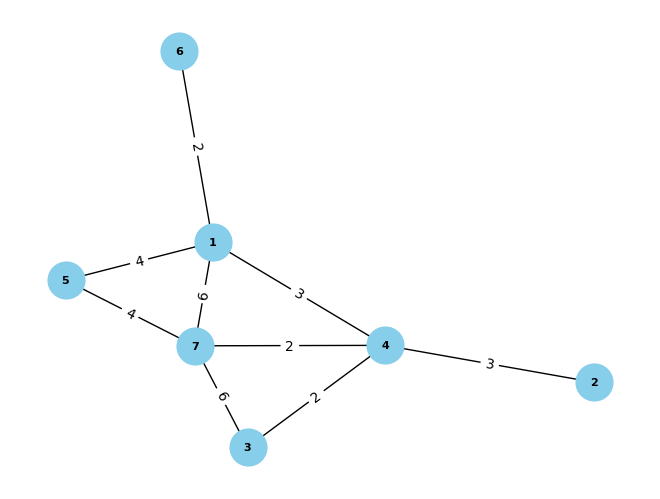

In [82]:
# Create a graph with 10 nodes
G = nx.Graph()

# Add nodes to the graph
nodes = 8

G.add_nodes_from(range(1, nodes))
G.add_edge(2, 4, weight=3)
G.add_edge(4, 3, weight=2)
G.add_edge(3, 7, weight=6)
G.add_edge(7, 1, weight=6)
G.add_edge(7, 4, weight=2)
G.add_edge(7, 5, weight=4)
G.add_edge(1, 6, weight=2)
G.add_edge(5, 1, weight=4)
G.add_edge(4, 1, weight=3)
'''
G.add_edge(5, 8, weight=1)
G.add_edge(5, 9, weight=4)
G.add_edge(9, 10, weight=2)
G.add_edge(9, 11, weight=2)
G.add_edge(11, 6, weight=1)
'''
# Plot the graph with weights
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)

# Add edge labels with weights
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

In [83]:
# 1.
adj_array = nx.adjacency_matrix(G, weight=None).toarray()
# 2.
times_array = create_time_matrix(G)
# 3.
infect_array = infection_matrix(G)
# 4.
np.random.seed(42)
nod_numbers = len(G.nodes())

probabilities = np.round(np.random.rand(nod_numbers, nod_numbers), decimals=2)
prob_array = np.where(adj_array == 1, probabilities, 0)

In [103]:
# Vertically stack the arrays
stack = np.dstack((adj_array, 
                   times_array,
                   prob_array, 
                   infect_array))

In [111]:
# A.1. Update time
time_updated, track = update_time(stack[:,:,1], seed_node = 4)

In [112]:
# A.2. Infection matrix
h = infect_func(stack, track, time_updated, p = 0.6)

In [113]:
track #NODES

array([3, 2, 6, 0, 1, 5, 4])

In [114]:
values = h[track[0],track,1]

In [120]:
array1 = track
array2 = values

# Concatenating two 1D arrays
concatenated_array = np.column_stack((array1, array2))


In [121]:
concatenated_array

array([[3., 0.],
       [2., 2.],
       [6., 2.],
       [0., 3.],
       [1., 3.],
       [5., 5.],
       [4., 6.]])

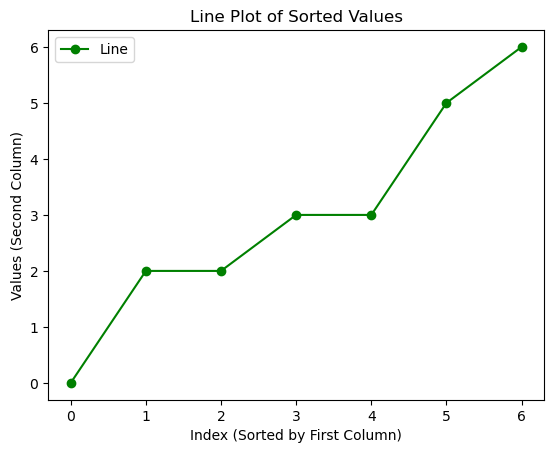

In [125]:
# Sorting the array based on the first column
sorted_array = concatenated_array[concatenated_array[:, 1].argsort()]

# Extracting sorted values for plotting
sorted_values = sorted_array[:, 1]

# Creating a line plot
plt.plot(sorted_values, marker='o', color='green', label='Line')

# Adding labels and title
plt.xlabel('Index (Sorted by First Column)')
plt.ylabel('Values (Second Column)')
plt.title('Line Plot of Sorted Values')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

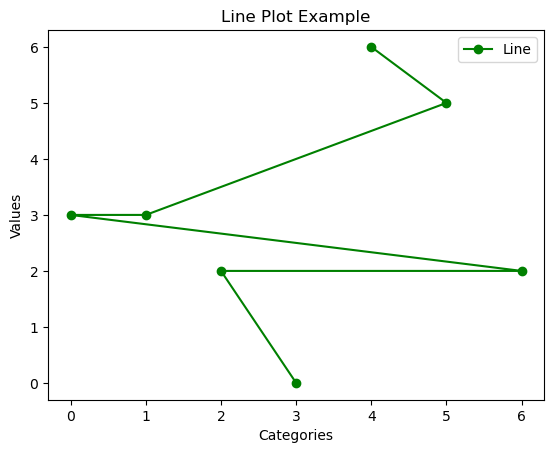

In [116]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)

# Creating a line plot
plt.plot(track, values, marker='o', color='green', label='Line')

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Line Plot Example')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

In [101]:
values

[25, 40, 30, 35]